## Resolución de un a ecuación diferencial

A continuación vamos a ver como se resuelve una ecuación diferencial utilizando Sympy.

En primer lugar tenemos que cargar el paquete mediante la instrucción (para ejecutar una celda hay que pulsar May+Enter):

In [8]:
from sympy import *

Recordad incluir esta instrucción si creais un notebook nuevo, es un olvido común (al menos, para mi).

El paso siguiente será crear los símbolos con los diferentes parámetros de nuestra ecuación diferencial. Podemos ponerlos en forma de lista, si no queremos definirlos uno a uno. Para definirlos utilizaremos la instrucción **symbols**. Daros cuenta que a la izquierda del igual los diferentes parámetros están separados por comas. En cambio, a la derecha, por espacios:

In [15]:
A, R, t, Q1 = symbols("A R t Q1")

También definiremos _H(t)_, pero con la diferencia de que se trata de una función, por lo que usaremos **Function** (la F es mayúscula):

In [30]:
H = Function("H")

Vamos a resolver la ecuación diferencial para un escalón unidad, es decir, $Q_1(t)=1\cdot U(t)$.

Observad que definimos _Q1_ antes de escribir la ecuación diferencial.

In [31]:
Q1 = 1

La ecuación que queremos resolver es:

$$A\frac{\mathrm{d} H(t)}{\mathrm{d}t} = q_1(t) - \frac{H(t)}{R}$$

Vamos a crear una variable llamada _eq_ para no tener que escribir la ecuación cada vez. La ecuación debemos expresarla pasando todos los términos al mismo lado de la igualdad, es decir:

$$A\frac{\mathrm{d} H(t)}{\mathrm{d}t} + \frac{H(t)}{R} - q_1(t) = 0$$

Para expresar la derivada de una función utilizaremos la instrucción **diff**. Por ejemplo, la primera derivada de la función __F(x)__ es ***diff(F(x),x)***. La segunda derivada sería ***diff(F(x),x,2)***.

Observad que he añadido **eq** tras haber definido la ecuación, para comprobar que es correcta.

In [32]:
eq = A*diff(H(t),t)+H(t)/R-Q1
eq

A*Derivative(H(t), t) - 1 + H(t)/R

Resolveremos la ecuación utiizando la instrucción **dsolve**. La sintaxis es sencilla:

dsolve(ecuación, función incógnita, condición inicial)

La ecuación ya la hemos definido, es **eq**.

Nuestra incognita es _H(t)_.

Como condición inicial tenemos que _H(0) = 0_, ya que estamos utilizando variables de desviación. Es importante que os fijéis en como se escribe la condición de contorno: **ics={H(0):0}**. Ponemos la condición iniciales entre llaves { } y escribimos dos puntos :, en lugar de un igual.

In [33]:
dsolve(eq, H(t), ics={H(0):0})

Eq(H(t), R + exp((A*log(-R) - t/R)/A))

Ya hemos resuelto la ecuación, pero se puede simplificar utilizando la instrucción **simplify**. Para operar sobre el útlimo resultado podemos utilizar _:

In [34]:
simplify(_)

Eq(H(t), R - R*exp(-t/(A*R)))

Ya tenemos el resultado esperado.

A continuación, vamos a resolver la ecuación para _A_ y _R_ iguales a la unidad. Básicamente vamos a repetir la secuencia de pasos anterior, pero vamos a agrupar las instrucciones en una misma celda, para que sea más compacto:

In [36]:
A = 1
R = 1
Q1 = 1
eq = A*diff(H(t),t)+H(t)/R-Q1
eq

H(t) + Derivative(H(t), t) - 1

In [47]:
dsolve(eq, H(t), ics={H(0):0})

Eq(H(t), 1 - exp(-t))

Ya hemos obtenido el resultado de la ecuación diferencial.

### Representación de la respuesta

Vamos a representar _H(t)_. La función que queremos representar es la parte derecha de la solución de la ecuación diferencia (_rhs_, right hand side). Para que todo quede más claro, vamos a llamarle _H_:

In [48]:
H = _.rhs
H

1 - exp(-t)

Representaremos la función _H_ para valores de _t_ enter 0 y 5 utilizando la instrucción **plot**. Fijaros como indicamos los límites de la variable _t_ que queremos representar:

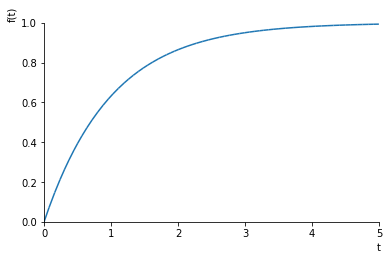

In [49]:
plot(H, (t, 0, 5))

Si queremos representar varias funciones, solo tenemos que ponerlas una tras otra separadas por comas. A continuación, represntaremos_H_ y _Q1_:

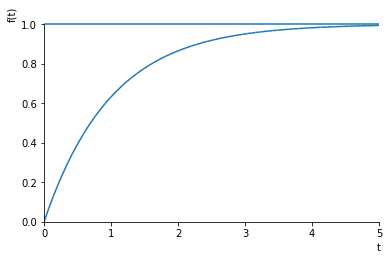

In [50]:
plot(H, Q1, (t, 0, 5))

El problema con el que nos encontramos es que todas las funciones aparecen dibujadas con el mismo color. Si queremos que aparezcan con colores diferentes, tenemos que hacerlo de la manera siguiente:

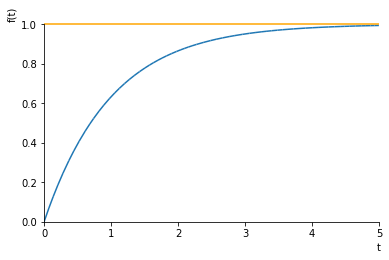

In [52]:
p = plot(H, Q1, (t,0,5), show=False)
p[1].line_color="orange" ## H es la función 0 y Q1 es la función 1 (empieza a contar en el 0)
p.show()

Estudia qué ocurre cuando aumenta o disminuye:

* _A_
* _R_
* $Q_1$

¿Coinciden los resultados con tu intuición?

### Entrada sinusoidal

A continuación vamos a repetir el proceso anterior, pero para una entrada sinusoidal, es decir, $Q_1 = \sin(t)$.

Volvemos definir los parámetros del modelo para asegurarnos que no tomamos valores de la resolución anterior.

In [143]:
A, R, t, Q1 = symbols("A R t Q1")
H = Function("H")

In [144]:
Q1 = sin(t)
Q1

sin(t)

In [145]:
eq = A*diff(H(t),t)+H(t)/R-Q1
eq

A*Derivative(H(t), t) - sin(t) + H(t)/R

In [146]:
dsolve(eq, H(t), ics={H(0):0})

Eq(H(t), (Piecewise((0, Eq(A, I/R) | Eq(A, -I/R)), (A*R**2/(A**2*R**2 + 1), True)) + Piecewise((t*exp(I*t)*sin(t)/2 + I*t*exp(I*t)*cos(t)/2 - I*exp(I*t)*sin(t)/2, Eq(A, -I/R)), (t*exp(-I*t)*sin(t)/2 - I*t*exp(-I*t)*cos(t)/2 + I*exp(-I*t)*sin(t)/2, Eq(A, I/R)), (-A**2*R**2*exp(t/(A*R))*cos(t)/(A**2*R**2 + 1) + A*R*exp(t/(A*R))*sin(t)/(A**2*R**2 + 1), True))/A)*exp(-t/(A*R)))

In [147]:
H = simplify(_).rhs
H

Piecewise(((t*sin(t) + I*t*cos(t) - I*sin(t))*exp(t*(I - 1/(A*R)))/(2*A), Eq(A, -I/R) & (Eq(A, I/R) | Eq(A, -I/R))), ((t*sin(t) - I*t*cos(t) + I*sin(t))*exp(-t*(I + 1/(A*R)))/(2*A), Eq(A, I/R) & (Eq(A, I/R) | Eq(A, -I/R))), (R*(-A*R*cos(t) + sin(t))/(A**2*R**2 + 1), Eq(A, I/R) | Eq(A, -I/R)), ((A**2*R**2/(A**2*R**2 + 1) + (t*sin(t) + I*t*cos(t) - I*sin(t))*exp(I*t)/2)*exp(-t/(A*R))/A, Eq(A, -I/R)), ((A**2*R**2/(A**2*R**2 + 1) + (t*sin(t) - I*t*cos(t) + I*sin(t))*exp(-I*t)/2)*exp(-t/(A*R))/A, Eq(A, I/R)), (R*(-A*R*exp(t/(A*R))*cos(t) + A*R + exp(t/(A*R))*sin(t))*exp(-t/(A*R))/(A**2*R**2 + 1), True))

Comprobamos que la solución es complicada, pero realmente no lo es, ya que $A \in \mathbb{R}$, por lo que solo nos interesa la última parte de la solución:

In [148]:
H.args[-1][0]


R*(-A*R*exp(t/(A*R))*cos(t) + A*R + exp(t/(A*R))*sin(t))*exp(-t/(A*R))/(A**2*R**2 + 1)

### Representación de la respuesta a una entrada sinusoidal

Vamos a considerar una entrada de tipo $Q_1 = \sin(\omega t)$, donde $\omega$ es la frecuencia angular.

In [149]:
A, R, t, Q1 = symbols("A R t Q1")
H = Function("H")
A = 1
R = 1
Q1 = sin(1*t)
eq = A*diff(H(t),t)+H(t)/R-Q1
# Resolvemos la ec., simplificamos y seleccionamos el lado derecho en un solo paso
H = simplify(dsolve(eq, H(t), ics={H(0):0})).rhs
H

-sqrt(2)*cos(t + pi/4)/2 + exp(-t)/2

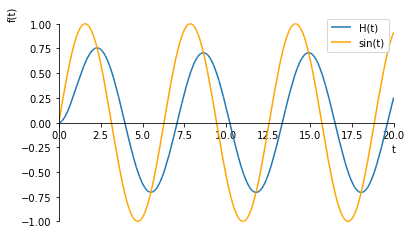

In [150]:
p = plot(H, Q1, (t,0,20), show=False, legend=True)
p[1].line_color="orange"
p[0].label = "H(t)"
p[1].label = "sin(t)"
p.show()

¿Cómo influye la frecuencia angular en la respuesta?